# Genetic Algorithm (Continuous)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [22]:
class Chromosome:
    def __init__(self, genes) -> None:
        self.genes = genes
        self.cost = None

    def __repr__(self) -> str:
        return f'Node(genes={self.genes}, cost={self.cost})'

    def __lt__(self, other):
        return self.cost < other.cost

## Objective function

In [23]:
def objective(x):
  return np.sum(np.square(x))  # sphere function

## Initialization

In [24]:
def initialization(m, n, ub, lb):
    # m -> no of chromosomes
    # n -> no of genes in chromosome
    pop = [Chromosome((ub - lb) * np.random.rand(n) + lb) for i in range(m)]
    for c in pop:
        c.cost = objective(c.genes)
    return pop

## Selection

In [25]:
def selection(pop):
    wts = [chr.cost for chr in pop]
    # print(wts)
    wts = wts - (min(wts)-1) # shifting so min value becomes 1
    wts = wts / sum(wts) # scaling to probability values

    # two indices between [0,len(pop)-1] without replacement
    ixs = np.random.choice(len(pop), 2, p=wts, replace=False) 

    # return pop[ixs[0]], pop[ixs[1]] # these get modified later, so make deep copies
    return copy.deepcopy(pop[ixs[0]]), copy.deepcopy(pop[ixs[1]])

## Crossover

In [26]:
def crossover(parent1, parent2, p_c):
    n = len(parent1.genes)

    child1 = Chromosome(np.zeros(n))
    child2 = Chromosome(np.zeros(n))
    for i in range(n):
        lb = min(parent1.genes[i], parent2.genes[i])
        ub = max(parent1.genes[i], parent2.genes[i])
        child1.genes[i] = (ub - lb) * np.random.rand() + lb
        child2.genes[i] = (ub - lb) * np.random.rand() + lb
    
    p1 = np.random.rand()
    p2 = np.random.rand()
    return (child1 if p1 < p_c else parent1, child2 if p2 < p_c else parent2)

## Mutation

In [27]:
def mutation(child, p_m, ub, lb):
    for i in range(len(child.genes)):
        p = np.random.rand()
        child.genes[i] = (ub[i] - lb[i]) * np.random.rand() + lb[i] if p < p_m else child.genes[i]
    child.cost = objective(child.genes) # because cost need not be correct any more
    return child

## Elitism

In [28]:
def elitism(pop, new_pop, e_r):
    m = len(pop)
    ec = int(e_r * m) # elites count
    # print(ec)
    pop.sort(reverse=True)
    new_pop.sort()
    new_pop[:ec] = pop[:ec]
    return new_pop

## Main Genetic Algorithm function

In [32]:
cost_list = []

def genetic_algorithm(m, n, max_gens, p_c, p_m, e_r, ub, lb):
    pop = initialization(m, n, ub, lb)

    for g in range(max_gens):

        new_pop = []

        for i in range(m//2):
            # print(i, pop)
            parent1, parent2 = selection(pop)
            child1, child2 = crossover(parent1, parent2, p_c)
            child1 = mutation(child1, p_m, ub, lb)
            child2 = mutation(child2, p_m, ub, lb)

            new_pop.append(child1)
            new_pop.append(child2)

        for c in new_pop:
            c.cost = objective(c.genes)

        pop = elitism(pop, new_pop, e_r)
        cost_list.append(max(pop).cost)
    
    plt.plot(cost_list)
    return max(pop)

Node(genes=[ 9.97764915  9.9903129  -9.93429448  9.82012982 -9.96910659 -9.97753108
  9.94585376  9.88655508  9.98083861  9.96375232], cost=988.9766815423947)

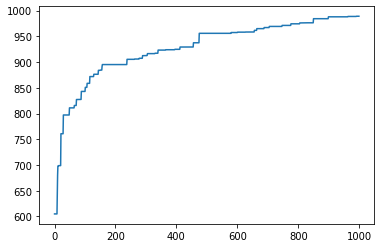

In [33]:
n = 10
ub = np.array([10 for i in range(n)])
lb = np.array([-10 for i in range(n)])
genetic_algorithm(50, n, 1000, 0.95, 0.1, 0.1, ub, lb)